## Pytorch Gradient or Derivatives

Back-propergation on one step

In [2]:
import torch

In [10]:
# setting a computational ground for grandient
# 
x= torch.tensor(2.0,requires_grad = True)

In [11]:
y=2*x**4 + x**3 +3*x**2 +5*x +1
y

tensor(63., grad_fn=<AddBackward0>)

In [12]:
type(y)

torch.Tensor

In [13]:
# This means, if we plogin some value of x in the first
# derivatives of y, we will have the below result
y.backward()
x.grad

tensor(93.)

In [14]:
x=torch.tensor([[1.,2.,3.],[3.,4.,5.]],requires_grad=True)
x

tensor([[1., 2., 3.],
        [3., 4., 5.]], requires_grad=True)

In [15]:
y=3*x +2
y

tensor([[ 5.,  8., 11.],
        [11., 14., 17.]], grad_fn=<AddBackward0>)

In [16]:
z=2*y**2
z

tensor([[ 50., 128., 242.],
        [242., 392., 578.]], grad_fn=<MulBackward0>)

In [17]:
out =z.mean()
out

tensor(272., grad_fn=<MeanBackward0>)

In [18]:
out.backward()

In [20]:
print(x.grad)

tensor([[10.0000, 16.0000, 22.0000],
        [22.0000, 28.0000, 34.0000]])


## LINEAR REGRESSION WITH PYTORCH

In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set
of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model
and the actual data, using a loss function like mean-squared-error.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import torch.nn as nn

### Create a column matrix of X values

We can create tensors right away rather than convert from NumPy arrays.

In [33]:
X=torch.linspace(1,50,50).reshape(-1,1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

### Create a "random" array of error values

We want 50 random integer values that collectively cancel each other out.

In [34]:
torch.manual_seed(71)
e=torch.randint(-8,9,(50,1),dtype=torch.float)

In [35]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

### Create a column matrix of y values

Here we'll set our own parameters of , plus the error amount.
y will have the same shape as X and e
weight = 2,
bias = 1

In [36]:
y=2*X+1+e

In [37]:
y.shape

torch.Size([50, 1])

Note, we cannot plot tensor directly, therefore, we must convert it to numpy arry in order to plot X vs y

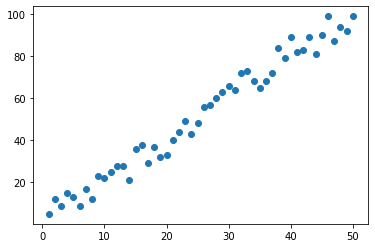

In [41]:
plt.scatter(X.numpy(), y.numpy());
# converting tensor into numpy array and plotting the scatter plot

In [44]:
# Creating a linear model
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


### Model classes

PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll
set up several neural network layers, and determine how each layer should perform its forward pass to the next
layer. For now, though, we only need a single linear layer.

In [45]:
# Setting up a model class
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear =nn.Linear(in_features, out_features)
    def forward(self,X):
        y_pred = self.linear(X)
        return y_pred
    

*NOTE:* The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the
type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers.
Going forward our models may contain linear layers, convolutional layers, and more.

When Model is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For
our purposes we'll use (1,1).
As above, we can see the initial hyperparameters.

In [52]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)


Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [53]:
for name,param in model.named_parameters():
    print(name, '\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


Now let's see the result when we pass a tensor into the model.

In [54]:
b=torch.tensor([2.0])
print(model.forward(b))

tensor([1.1758], grad_fn=<AddBackward0>)


## Data set with Pytorch

In [55]:
import pandas as pd

### Loading data from files

We've seen how to load NumPy arrays into PyTorch, and anyone familiar with pandas.read_csv() can use it to
prepare data before forming tensors. Here we'll load the iris flower dataset saved as a .csv file.

In [57]:
df = pd.read_csv('data/iris.csv')

In [58]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [59]:
df.shape

(150, 5)

In [60]:
len(df)

150

## Plot the data

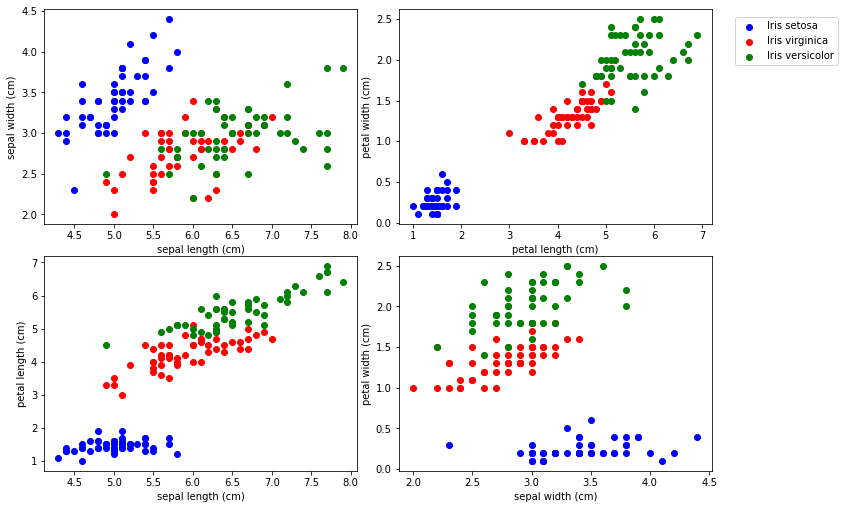

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

# sepal length (cm) sepal width (cm) petal length (cm) petal width (cm) target

ax=[0, 5.1, 3.5,1.4, 0.2, 0.0,
1, 4.9, 3.0, 1.4,0.2, 0.0,
2, 4.7, 3.2, 1.3, 0.2, 0.0,
3, 4.6, 3.1, 1.5, 0.2, 0.0,
4, 5.0, 3.6, 1.4, 0.2, 0.0]


plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

### The classic method for building train/test split tensors

Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [90]:
import sklearn
from sklearn.model_selection import train_test_split

In [91]:
# Let's split the data into x and y
features=df.drop('target',axis=1).values
labels=df['target'].values

In [92]:
# Now let's split your data into train and test set
x_train, x_test, y_train,y_test=train_test_split(features,
                                                labels,
                                                 test_size=0.2,
                                                random_state=33)

In [93]:
len(x_train), len(y_train), len(x_test), len(y_test)

(120, 120, 30, 30)

In [94]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [95]:
y_test

tensor([[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [0],
        [2],
        [2],
        [2],
        [0],
        [2],
        [1],
        [2],
        [1],
        [2],
        [0],
        [1],
        [2],
        [0],
        [0],
        [2],
        [0],
        [2],
        [2],
        [1],
        [1],
        [2],
        [2]])

*NOTE:* The importance of a balanced training set is discussed in A systematic study of the class imbalance
problem in convolutional neural networks by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17,
latest rev 10/13/18) https://arxiv.org/abs/1710.05381
For example, the authors show that oversampling a less common class so that it matches the more
common classes is always the preferred choice.

## Using PyTorch's Dataset and DataLoader classes

A far better alternative is to leverage PyTorch's Dataset and DataLoader classes.
Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits
from torch.utils.data.Dataset (we'll do this in the CNN section). For now, we can use the built-in
TensorDataset class.

In [96]:
from torch.utils.data import TensorDataset, DataLoader

In [97]:
data =df.drop('target', axis=1).values
labels= df['target'].values

In [98]:
iris=TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [99]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [100]:
iris_loader = DataLoader(iris, batch_size =50, shuffle=True)

In [101]:
for i_batch,sample_batch in enumerate(iris_loader):
    print(i_batch, sample_batch)

0 [tensor([[5.8000, 2.7000, 4.1000, 1.0000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [6.0000, 3.4000, 4.5000

# CLASSIFICATION WITH PYTORCH-TENSOR

## BASIC PYTORCH NEURAL NETWORK

Now it's time to put the pieces together. In this section we'll:

* create a multi-layer deep learning model
* load data
* train and validate the model

We'll also introduce a new step:

* save and load a trained model

Our goal is to develop a model capable of classifying an iris plant based on four features. This is a multi-class
classification where each sample can belong to ONE of 3 classes (Iris setosa, Iris virginica or Iris versicolor). The
network will have 4 input neurons (flower dimensions) and 3 output neurons (scores). Our loss function will
compare the target label (ground truth) to the corresponding output score

*NOTE:* Multi-class classifications usually involve converting the target vector to a one_hot encoded matrix.
That is, if 5 labels show up as

tensor([0,2,1,0,1])
then we would encode them as:
tensor([[1, 0, 0],
[0, 0, 1],
[0, 1, 0],
[1, 0, 0],
[0, 1, 0]])
This is easily accomplished with torch.nn.functional.one_hot().
However, our loss function torch.nn.CrossEntropyLoss() takes care of this for us.

## IMPORT STANDARD LIBRARIES NECESSARY

In [104]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

### Create a model class

For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should
include at least one hidden layer in our model.

In the forward section we'll use the rectified linear unit (ReLU) function
f(x) = max(0,x) as our activation function. This is available as a full module torch.nn.ReLU or as just a functional call
torch.nn.functional.relu

In [186]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1) # input layer
        self.fc2 = nn.Linear(h1, h2) # hidden layer
        self.out = nn.Linear(h2, out_features) # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) # First activation function
        x = F.relu(self.fc2(x)) # second activation function
        x = self.out(x) # output
        return x

In [187]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model =Model()

### Let's use our iris dataset

In [188]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot the dataset

The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among
them.
We'll use the index positions of the columns to grab their names in pairs with plots = [(0,1),(2,3),(0,2),
(1,3)].
Here (0,1) sets "sepal length (cm)" as x and "sepal width (cm)" as y

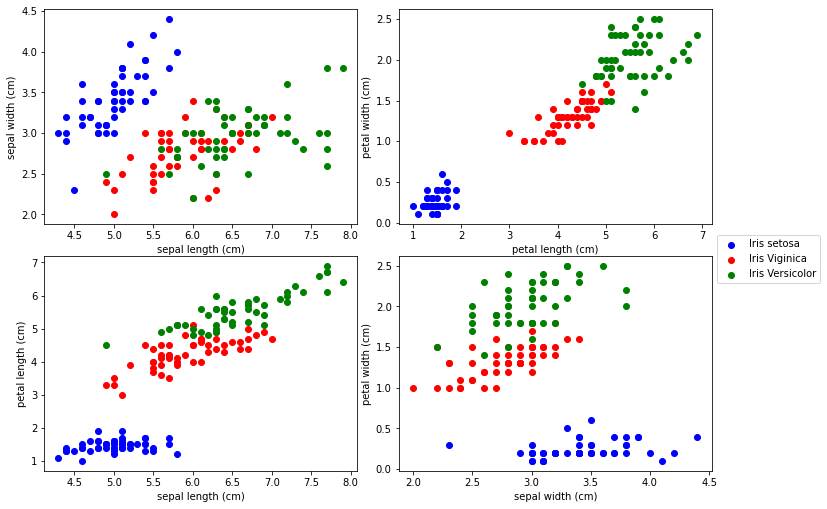

In [153]:
fig, axes =plt.subplots(nrows =2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2), (1,3)]
colors =['b', 'r', 'g']
labels = ['Iris setosa', 'Iris Viginica', 'Iris Versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x=df.columns[plots[i][0]]
        y=df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x],
                   df[df['target']==j][y],color=colors[j])
        ax.set(xlabel=x,ylabel=y)
plt.legend(labels=labels,loc=3,bbox_to_anchor=(1.0, 0.85))
plt.show()

In [189]:
# Let's split our data into x and y
X=df.drop('target', axis=1).values
Y=df['target'].values

In [190]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.2,
                                               random_state=33)

In [191]:
# Let's convert our split data into tensor
X_train =torch.FloatTensor(X_train) 
X_test=torch.FloatTensor(X_test)

In [192]:
Y_train =torch.LongTensor(Y_train)
Y_test= torch.LongTensor(Y_test)

In [195]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

### Define loss equations and optimizations

As before, we'll utilize Cross Entropy with torch.nn.CrossEntropyLoss()
For the optimizer, we'll use a variation of Stochastic Gradient Descent called Adam (short for Adaptive Moment
Estimation), with torch.optim.Adam()

In [196]:
torch.manual_seed(4)
model=Model()

In [200]:
# Let.s defind our model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.parameters()

<generator object Module.parameters at 0x7f33f658eb30>

In [201]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

### Train the model

In [204]:
epochs =100 # Disire number of epochs
losses =[]
for i in range(epochs):
    #Forward and get prediction
    Y_pred =model.forward(X_train)

    # Calculate the loss/error
    loss=criterion(Y_pred, Y_train)
    losses.append(loss)
    if i%10==0:
        print(f'Epoch {i} and loss is : {loss}')
    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is : 0.2172047644853592
Epoch 10 and loss is : 0.1290803998708725
Epoch 20 and loss is : 0.08912920951843262
Epoch 30 and loss is : 0.07264897227287292
Epoch 40 and loss is : 0.0648985281586647
Epoch 50 and loss is : 0.060537803918123245
Epoch 60 and loss is : 0.057692404836416245
Epoch 70 and loss is : 0.055632151663303375
Epoch 80 and loss is : 0.05404889956116676
Epoch 90 and loss is : 0.052778176963329315


Text(0, 0.5, 'Loss')

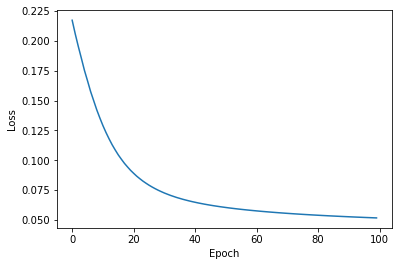

In [205]:
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [207]:
with torch.no_grad():
    Y_val =model.forward(X_test)
    loss = criterion(Y_val, Y_test)

In [208]:
loss

tensor(0.0476)

In [213]:
correct =0
with torch.no_grad():
    for i, data in enumerate(X_test):
        Y_val = model.forward(data)
        print(f'{i+1}.)  {str(Y_val.argmax().item())}  {Y_test[i]}')
        
        if Y_val.argmax().item()==Y_test[i]:
            correct +=1
print(f'we got {correct} correct!')            
        
        

1.)  1  1
2.)  1  1
3.)  0  0
4.)  1  1
5.)  2  2
6.)  2  2
7.)  0  0
8.)  0  0
9.)  2  2
10.)  2  2
11.)  2  2
12.)  0  0
13.)  2  2
14.)  1  1
15.)  2  2
16.)  1  1
17.)  2  2
18.)  0  0
19.)  1  1
20.)  2  2
21.)  0  0
22.)  0  0
23.)  2  2
24.)  0  0
25.)  2  2
26.)  2  2
27.)  1  1
28.)  1  1
29.)  2  2
30.)  2  2
we got 30 correct!


## Save the trained model to a file

In [220]:
torch.save(model.state_dict(), 'My_Irist_model.pt')

### Load a new model
We'll load a new model object and test it as we had before to make sure it worked.

In [221]:
new_model = Model()
new_model.load_state_dict(torch.load('My_Irist_model.pt'))

<All keys matched successfully>

In [222]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

Let's make prediction on a new flower tha theour model has never seen before

In [223]:
mystery_iris = torch.tensor([5.6, 3.7,2.2,0.5])

In [224]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([ 15.0210,   9.4703, -23.1245])
tensor(0)
